# Module: Support Vector Machines (SVM) in Machine Learning

Welcome to this module on Support Vector Machines (SVM)! In this notebook, you will explore the foundational concepts and practical applications of SVMs for both classification and regression. SVMs are powerful supervised learning models that aim to find the optimal separating hyperplane between classes by maximizing the margin. The margin is the distance between the hyperplane and the closest data points from each class, known as support vectors.

Mathematically, for a binary classification problem with data $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$ where $y_i \in \{-1, 1\}$, the SVM seeks to solve:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to } \ y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \ \forall i
$$
This means we want to find the weight vector $\mathbf{w}$ and bias $b$ that define the hyperplane $\mathbf{w}^T \mathbf{x} + b = 0$. The term $\frac{1}{2} \|\mathbf{w}\|^2$ is minimized to maximize the margin (distance between the hyperplane and the closest points). The constraint $y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1$ ensures that all data points are correctly classified and lie on the correct side of the margin: for $y_i = 1$, $\mathbf{w}^T \mathbf{x}_i + b \geq 1$; for $y_i = -1$, $\mathbf{w}^T \mathbf{x}_i + b \leq -1$.

You will learn about the theory, kernel tricks for nonlinear data, hyperparameter tuning, and model evaluation using ROC and PR curves. By the end of this module, you will have a strong grasp of both the theory and practice of SVMs in machine learning.

# Topics Covered

1. **Introduction to Support Vector Machines:** Overview of SVMs, their purpose, and key concepts such as margin, support vectors, and hyperplanes.
2. **Linear SVM for Classification:** How SVMs find the optimal linear boundary for separable and non-separable data, including the role of regularization.
3. **Nonlinear SVM and the Kernel Trick:** Using kernel functions to handle data that is not linearly separable by mapping it to higher-dimensional spaces.
4. **SVM for Regression (SVR):** Extending SVMs to regression tasks using the $\epsilon$-insensitive loss.
5. **Hyperparameter Tuning and Model Selection:** Techniques for selecting the best SVM parameters using cross-validation and grid search.
6. **Model Evaluation and Visualization:** Methods for interpreting SVM results, including ROC and PR curves, and visualizing decision boundaries.
7. **SVM from Scratch with Scipy: Linear and Nonlinear Kernels:** Utilizing Scipy for SVM problems.
8. **Summary and Self-Assessment:** Key takeaways and questions to reinforce your understanding of SVMs.

---

# Introduction to Support Vector Machines

## What is an SVM?
Support Vector Machines (SVMs) are supervised learning models used for classification and regression. They work by finding the optimal hyperplane that separates classes with the maximum margin. The margin is the distance between the hyperplane and the closest data points from each class, called support vectors.

The equation of a hyperplane in $d$-dimensional space is:
$$
\mathbf{w}^T \mathbf{x} + b = 0
$$
where $\mathbf{w}$ is the normal vector and $b$ is the bias.

## Key Concepts
- **Margin:** The distance between the separating hyperplane and the nearest data points from each class. The margin is given by $\frac{2}{\|\mathbf{w}\|}$.
- **Support Vectors:** The data points closest to the hyperplane, which define its position and margin.
- **Hyperplane:** The decision boundary that separates different classes. For two classes, the optimal hyperplane maximizes the margin.

## Applications
- Text classification (e.g., spam detection)
- Image recognition
- Bioinformatics (e.g., cancer classification)

## Strengths and Limitations
- Effective in high-dimensional spaces
- Robust to overfitting (with proper regularization)
- Can be computationally intensive for large datasets

SVMs can be extended to nonlinear boundaries using kernel functions, which will be discussed in later sections.

---

# Linear SVM for Classification

## The Linear Separable Case
A linear SVM finds the hyperplane that best separates two classes by maximizing the margin. For perfectly separable data, the SVM solves:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to } \ y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \ \forall i
$$
Here, $\mathbf{w}$ is the normal vector to the hyperplane, $b$ is the bias, and $\|\mathbf{w}\|$ is the Euclidean norm of $\mathbf{w}$. Minimizing $\frac{1}{2} \|\mathbf{w}\|^2$ maximizes the margin between the classes. The constraint $y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1$ ensures that all points are on the correct side of the margin.

## Soft Margin SVM and Regularization
When data is not perfectly separable, SVM introduces slack variables $\xi_i$ and a regularization parameter $C$ to allow some misclassifications while still maximizing the margin:

$$
\min_{\mathbf{w}, b, \xi} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{subject to } \ y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \ \xi_i \geq 0
$$
Here, $\xi_i$ are slack variables that allow some points to be within the margin or misclassified. The parameter $C$ controls the trade-off between maximizing the margin and minimizing the total error (sum of $\xi_i$). A larger $C$ penalizes misclassifications more heavily.

## Visualizing Linear SVMs
The following example demonstrates a linear SVM on real data, showing the decision boundary, margin, and support vectors. The support vectors are the points that lie closest to the margin and are critical in defining the hyperplane.

Class distribution: [ 76 210]


C:\Users\DELL\AppData\Local\Temp\ipykernel_21164\2533112125.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"')


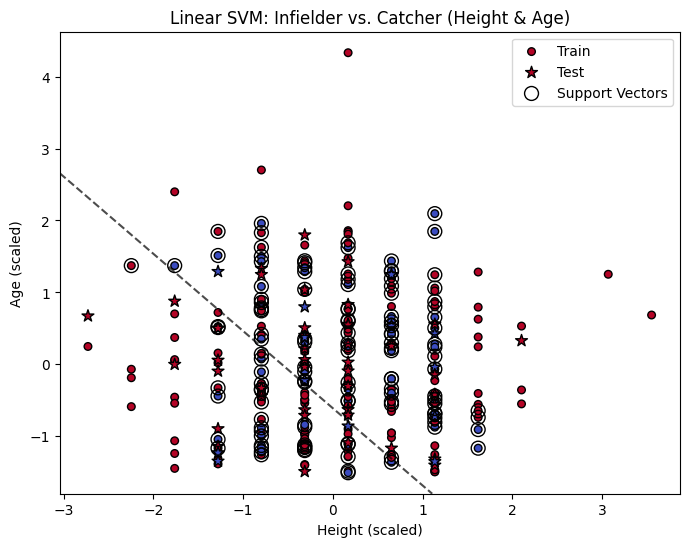

In [3]:
# Linear SVM Example using MLB dataset (Height, Age to predict Position)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load MLB dataset
df = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"')

# Use Height and Age to predict PosCategory (binary: Infielder vs. Catcher)
df = df.dropna(subset=['Height', 'Age', 'PosCategory'])
df = df[df['PosCategory'].isin(['Infielder', 'Catcher'])]  # Only keep two classes
X = df[['Height', 'Age']].values
y = (df['PosCategory'] == 'Infielder').astype(int).values

# Check that both classes are present
print('Class distribution:', np.bincount(y))

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear SVM
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train_scaled, y_train)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k', label='Train')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test, cmap=plt.cm.coolwarm, s=80, marker='*', edgecolors='k', label='Test')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Height (scaled)')
plt.ylabel('Age (scaled)')
plt.title('Linear SVM: Infielder vs. Catcher (Height & Age)')
plt.legend()
plt.show()

## Explanation
- The SVM finds the widest possible margin between classes by solving an optimization problem.
- The decision function for a linear SVM is:
  $$
  f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
  $$
  Here, $\mathbf{w}$ is the weight vector (normal to the hyperplane), $\mathbf{x}$ is the input feature vector, and $b$ is the bias. The sign of $f(\mathbf{x})$ determines the predicted class.
- The margin is $\frac{2}{\|\mathbf{w}\|}$, which is the distance between the two parallel hyperplanes that pass through the support vectors of each class. Maximizing the margin improves generalization.
- The support vectors are the points that satisfy $y_i (\mathbf{w}^T \mathbf{x}_i + b) = 1$. These are the closest points to the hyperplane and determine its position.
- The parameter $C$ controls the penalty for misclassification. A small $C$ allows more misclassifications (wider margin), while a large $C$ tries to classify all points correctly (narrower margin).
- Support vectors are the critical points that define the margin and the position of the hyperplane.

## Summary
Linear SVMs are effective for linearly separable data and provide interpretable decision boundaries. The optimization problem seeks to maximize the margin while minimizing classification errors:

$$
\min_{\mathbf{w}, b, \xi} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
$$

Here, $\frac{1}{2} \|\mathbf{w}\|^2$ maximizes the margin, $C$ is the regularization parameter, and $\sum_{i=1}^n \xi_i$ is the total slack (misclassification penalty).

Support vectors are critical for defining the margin and the decision boundary. The margin is inversely proportional to the norm of $\mathbf{w}$: $\text{Margin} = \frac{2}{\|\mathbf{w}\|}$.

## Review and Self-Assessment
- What is the role of support vectors in SVM?
- How does the parameter $C$ affect the SVM model?
- When is a linear SVM appropriate?
- Write the equation for the SVM decision function and margin, and explain each term.

---

# Nonlinear SVM and the Kernel Trick

## Why Kernels?
Not all datasets are linearly separable. The kernel trick allows SVMs to operate in a higher-dimensional space without explicitly computing the transformation, enabling nonlinear decision boundaries. The kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ computes the inner product in the transformed space:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
$$
Here, $\phi(\cdot)$ is a mapping from the original feature space to a higher-dimensional space. The kernel function computes the inner product in this new space without explicitly performing the transformation, making computation efficient.

## Common Kernels
- **Polynomial kernel:** $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^T \mathbf{z} + c)^d$ where $c$ is a constant and $d$ is the degree. This kernel allows the SVM to fit polynomial decision boundaries.
- **RBF (Gaussian) kernel:** $K(\mathbf{x}, \mathbf{z}) = \exp(-\gamma \|\mathbf{x} - \mathbf{z}\|^2)$ where $\gamma$ controls the width of the Gaussian. This kernel enables the SVM to fit highly nonlinear boundaries.
- **Sigmoid kernel:** $K(\mathbf{x}, \mathbf{z}) = \tanh(\alpha \mathbf{x}^T \mathbf{z} + c)$ where $\alpha$ and $c$ are parameters. This kernel is similar to the activation function in neural networks.

## SVM Dual Problem with Kernels
The dual optimization problem for SVMs with kernels is:
$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to } \sum_{i=1}^n \alpha_i y_i = 0, \ \alpha_i \geq 0
$$
Here, $\alpha_i$ are Lagrange multipliers, $y_i$ are class labels, and $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function. The solution gives the optimal $\alpha_i$ values, which determine the support vectors and the decision boundary.

## Visualizing Nonlinear Decision Boundaries
The following example demonstrates an SVM with an RBF kernel on a nonlinear dataset, showing how the kernel enables complex, flexible decision boundaries.

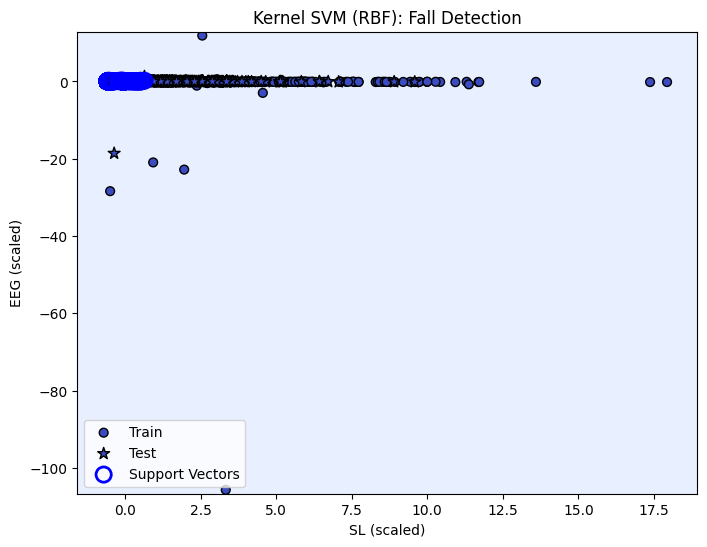

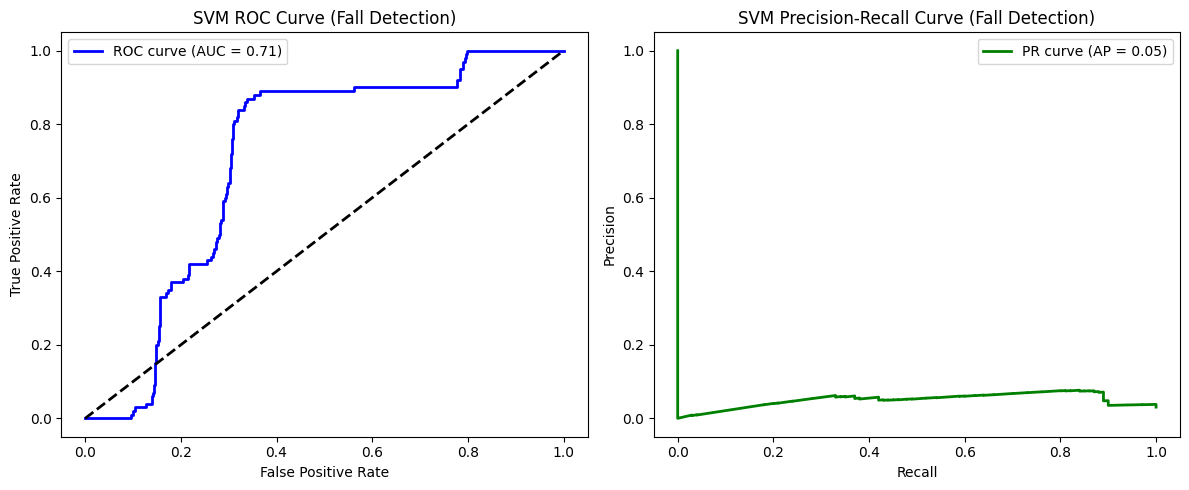

Test set accuracy: 0.97
Number of support vectors: 828


In [15]:
# Kernel SVM Example using Fall Detection dataset (binary classification)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load fall detection dataset
# Use only two most informative features for visualization
feature_cols = ['SL', 'EEG']
df = pd.read_csv('data/falldetection.csv')
df = df.dropna(subset=feature_cols + ['ACTIVITY'])
# Binary: ACTIVITY==1 is fall, others not
X = df[feature_cols].values
y = (df['ACTIVITY'] == 1).astype(int).values

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit SVM with RBF kernel
clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
clf.fit(X_train_scaled, y_train)

# Plot decision boundary and support vectors
plt.figure(figsize=(8,6))
# Create meshgrid for decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# Plot training and test points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=40, edgecolors='k', label='Train')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=80, marker='*', edgecolors='k', label='Test')
# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, facecolors='none', edgecolors='b', linewidths=2, label='Support Vectors')
plt.xlabel(f'{feature_cols[0]} (scaled)')
plt.ylabel(f'{feature_cols[1]} (scaled)')
plt.title('Kernel SVM (RBF): Fall Detection')
plt.legend()
plt.show()

# ROC/PR curves
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_score = clf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (Fall Detection)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve (Fall Detection)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Test set accuracy: {clf.score(X_test_scaled, y_test):.2f}")
print(f"Number of support vectors: {len(clf.support_vectors_)}")

## Explanation
- The kernel function enables SVM to learn complex, nonlinear boundaries by implicitly mapping data to a higher-dimensional space.
- The RBF (Gaussian) kernel is defined as:
  $$
  K(\mathbf{x}, \mathbf{z}) = \exp(-\gamma \|\mathbf{x} - \mathbf{z}\|^2)
  $$
  Here, $\gamma$ is a parameter that controls the width of the Gaussian. A small $\gamma$ means a wide influence, while a large $\gamma$ means a narrow influence. $\|\mathbf{x} - \mathbf{z}\|^2$ is the squared Euclidean distance between two points.
- The SVM decision function with kernels is:
  $$
  f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
  $$
  Here, $\alpha_i$ are the dual coefficients (nonzero only for support vectors), $y_i$ are the class labels, $K(\mathbf{x}_i, \mathbf{x})$ is the kernel function, and $b$ is the bias. The sign of $f(\mathbf{x})$ determines the predicted class.
- The parameter $\gamma$ controls the influence of individual training examples. The choice of kernel and its parameters affects the flexibility and performance of the SVM.

## Summary
Kernel SVMs are versatile and can handle complex datasets by transforming the feature space using kernel functions. The choice of kernel and its parameters is crucial for model performance. The most common kernels are polynomial and RBF (Gaussian), each with their own parameters:

- Polynomial: $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^T \mathbf{z} + c)^d$
- RBF: $K(\mathbf{x}, \mathbf{z}) = \exp(-\gamma \|\mathbf{x} - \mathbf{z}\|^2)$

The dual formulation allows SVMs to use kernels efficiently.

## Review and Self-Assessment
- What is the kernel trick and why is it useful?
- How does the RBF kernel differ from the linear kernel?
- When should you use a kernel SVM?
- Write the equation for the SVM decision function with kernels.

---

# SVM for Regression (SVR)

## Epsilon-Insensitive Loss
Support Vector Regression (SVR) extends SVM to regression tasks. SVR aims to fit a function within a tube of width $\epsilon$ around the data, ignoring errors within this tube and penalizing only larger deviations. The $\epsilon$-insensitive loss is defined as:

$$
L_{\epsilon}(y, f(\mathbf{x})) = \max(0, |y - f(\mathbf{x})| - \epsilon)
$$

## SVR Optimization Problem
The SVR optimization problem is:
$$
\min_{\mathbf{w}, b, \xi, \xi^*} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
\text{subject to } \begin{cases}
  y_i - (\mathbf{w}^T \mathbf{x}_i + b) \leq \epsilon + \xi_i \\
  (\mathbf{w}^T \mathbf{x}_i + b) - y_i \leq \epsilon + \xi_i^* \\
  \xi_i, \xi_i^* \geq 0
\end{cases}
$$

## Differences from Standard Regression
- SVR focuses on fitting within the $\epsilon$-tube rather than minimizing squared error.
- The parameters $C$ and $\epsilon$ control the trade-off between flatness and tolerance to errors.
- SVR can use kernels to model nonlinear relationships.

## Example: SVR on Real Data

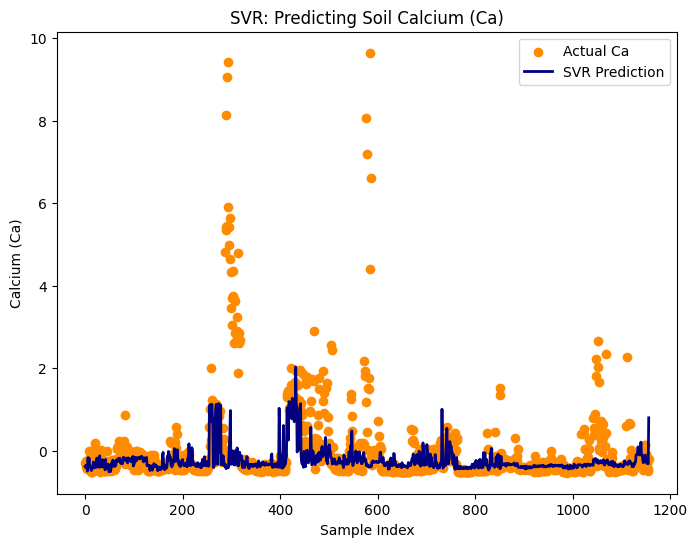

In [5]:
# SVR Example using Soil Spectral dataset (predicting Ca)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load soil dataset
df = pd.read_csv('data/training.csv')
spectral_cols = [col for col in df.columns if col.startswith('m')]
features = spectral_cols[:10]  # Use first 10 spectral features for demo
df = df.dropna(subset=features + ['Ca'])
X = df[features].values
y = df['Ca'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_scaled, y)
y_pred = svr.predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), y, color='darkorange', label='Actual Ca')
plt.plot(range(len(y)), y_pred, color='navy', lw=2, label='SVR Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Calcium (Ca)')
plt.title('SVR: Predicting Soil Calcium (Ca)')
plt.legend()
plt.show()

## Explanation
- SVR uses the $\epsilon$-insensitive loss to focus on significant errors, ignoring errors within the $\epsilon$-tube.
- The SVR decision function is:
  $$
  f(\mathbf{x}) = \sum_{i=1}^n (\alpha_i - \alpha_i^*) K(\mathbf{x}_i, \mathbf{x}) + b
  $$
  where $\alpha_i, \alpha_i^*$ are dual variables and $K$ is the kernel function.
- The parameters $C$ and $\epsilon$ control the trade-off between model complexity and tolerance to errors. Larger $C$ means less tolerance to errors, smaller $\epsilon$ means a narrower tube.
- SVR can model complex, nonlinear relationships using kernels, just like SVM for classification.

## Summary
SVR is a flexible regression method that can model complex relationships and is robust to outliers within the $\epsilon$-tube. The optimization problem is:

$$
\min_{\mathbf{w}, b, \xi, \xi^*} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
$$

The $\epsilon$-insensitive loss allows SVR to ignore small errors and focus on significant deviations.

## Review and Self-Assessment
- How does SVR differ from standard regression?
- What is the role of the $\epsilon$ parameter?
- When would you use SVR over linear regression?
- Write the equation for the SVR decision function.

---

# Hyperparameter Tuning and Model Selection

## Key Hyperparameters
- **C:** Regularization parameter controlling margin width and misclassification penalty. Larger $C$ means less regularization.
- **gamma:** Kernel coefficient for RBF and polynomial kernels. Controls the influence of individual training examples.
- **Kernel:** Choice of kernel function (linear, RBF, polynomial, etc.) determines the shape of the decision boundary.

## Grid Search and Cross-Validation
Grid search with cross-validation is commonly used to find the best combination of hyperparameters for SVMs. In $k$-fold cross-validation, the data is split into $k$ subsets, and the model is trained and validated $k$ times:

$$
\text{CV Score} = \frac{1}{k} \sum_{i=1}^k \text{Score}_i
$$

Grid search systematically tries all combinations of parameters and selects the one with the best cross-validation score.

## Practical Tips
- Scale your features before training SVMs to ensure all features contribute equally.
- Use cross-validation to avoid overfitting and select robust parameters.
- Start with the RBF kernel for most problems, as it is flexible and works well in many cases.

In [6]:
# Hyperparameter Tuning Example
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1, 10]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.3f}")
print(f"Test set score: {grid.score(X_test, y_test):.3f}")

Best parameters: {'C': 1, 'gamma': 10}
Best cross-validation score: 0.976
Test set score: 0.956


## Explanation
- Grid search automates the process of trying multiple parameter values to find the best combination.
- Cross-validation ensures robust evaluation and helps prevent overfitting by averaging performance across multiple splits.
- The best parameters are selected based on validation performance:
  $$
  (C^*, \gamma^*) = \arg\max_{C, \gamma} \text{CV Score}(C, \gamma)
  $$
- $C$ controls the trade-off between margin width and misclassification penalty, $\gamma$ controls the kernel's flexibility.

## Summary
Hyperparameter tuning is essential for optimal SVM performance. The choice of $C$, $\gamma$, and kernel can significantly affect results. Grid search and cross-validation are standard techniques for model selection:

- $C$: Regularization parameter, controls margin and misclassification penalty.
- $\gamma$: Kernel parameter, controls the influence of data points in RBF and polynomial kernels.
- Kernel: Determines the shape of the decision boundary.

## Review and Self-Assessment
- What does the parameter $C$ control in SVM?
- How does $\gamma$ affect the RBF kernel?
- Why is cross-validation important in model selection?
- Write the equation for the cross-validation score.

---

# Model Evaluation and Visualization

## Interpreting SVM Decision Boundaries
Visualizing the decision boundaries helps understand how the SVM separates classes and which points are support vectors. For a linear SVM, the decision boundary is given by:
$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

## ROC and PR Curves for SVM Classifiers
ROC (Receiver Operating Characteristic) and PR (Precision-Recall) curves are useful for evaluating the performance of SVM classifiers, especially in imbalanced datasets.
- **ROC Curve:** Plots True Positive Rate (TPR) vs. False Positive Rate (FPR):
  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$
- **PR Curve:** Plots Precision vs. Recall:
  $$
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \quad \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

## Feature Importance and Support Vectors
While SVMs do not provide feature importance directly, the coefficients $\mathbf{w}$ in linear SVMs and the location of support vectors can offer insights into the model's decisions.

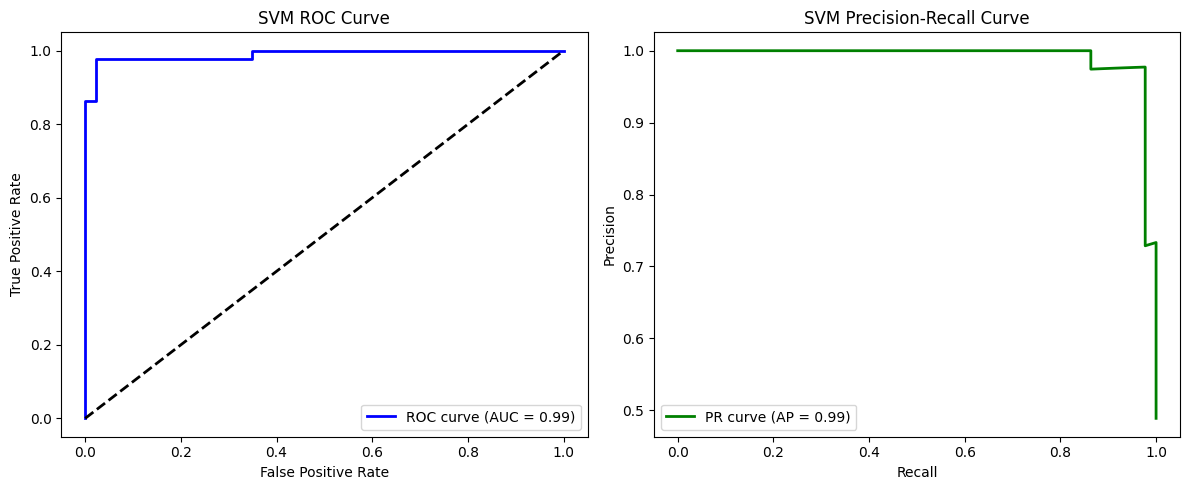

In [7]:
# SVM ROC and PR Curve Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM with probability estimates
clf = SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train)

# Predict probabilities
y_score = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

## Explanation
- The ROC curve shows the trade-off between sensitivity (TPR) and specificity (1 - FPR). The area under the ROC curve (AUC) summarizes the model's ability to distinguish between classes:
  $$
  \text{AUC} = \int_0^1 \text{TPR}(\text{FPR}) \, d\text{FPR}
  $$
- The PR curve is useful for imbalanced datasets, focusing on the positive class. The average precision (AP) summarizes the PR curve:
  $$
  \text{AP} = \sum_n (R_n - R_{n-1}) P_n
  $$
- AUC and AP provide single-number summaries of model performance, with higher values indicating better discrimination.

## Summary
Visualization of SVM decision boundaries and evaluation curves helps interpret model performance and select optimal thresholds. ROC and PR curves are defined as:

- ROC: $\text{TPR}$ vs. $\text{FPR}$, summarized by AUC.
- PR: Precision vs. Recall, summarized by Average Precision (AP).

Support vectors and coefficients in linear SVMs provide insight into the model's decisions.

## Review and Self-Assessment
- What does the area under the ROC curve represent?
- When should you use a PR curve?
- How do you interpret SVM decision boundaries?
- Write the equations for TPR, FPR, Precision, and Recall.

---

# SVM from Scratch with Scipy: Linear and Nonlinear Kernels

In this example, we implement a simple SVM using only NumPy and SciPy's optimization tools. We use a synthetic dataset with two clearly separable classes to demonstrate both a linear and a Gaussian (RBF) kernel. This makes the geometric intuition and margin visualization of SVMs especially clear.

## SVM Dual Problem
The SVM dual optimization problem is:
$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to } \sum_{i=1}^n \alpha_i y_i = 0, \ \alpha_i \geq 0
$$
where $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function.

## Margin and Support Vectors
- The margin is $\frac{2}{\|\mathbf{w}\|}$ in the linear case.
- Support vectors are the points with $\alpha_i > 0$; they define the margin and the decision boundary.

## Kernel Trick
- **Linear kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$
- **RBF (Gaussian) kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)$

This example is ideal for educational purposes, as it illustrates the geometric intuition behind SVMs and the effect of different kernels.

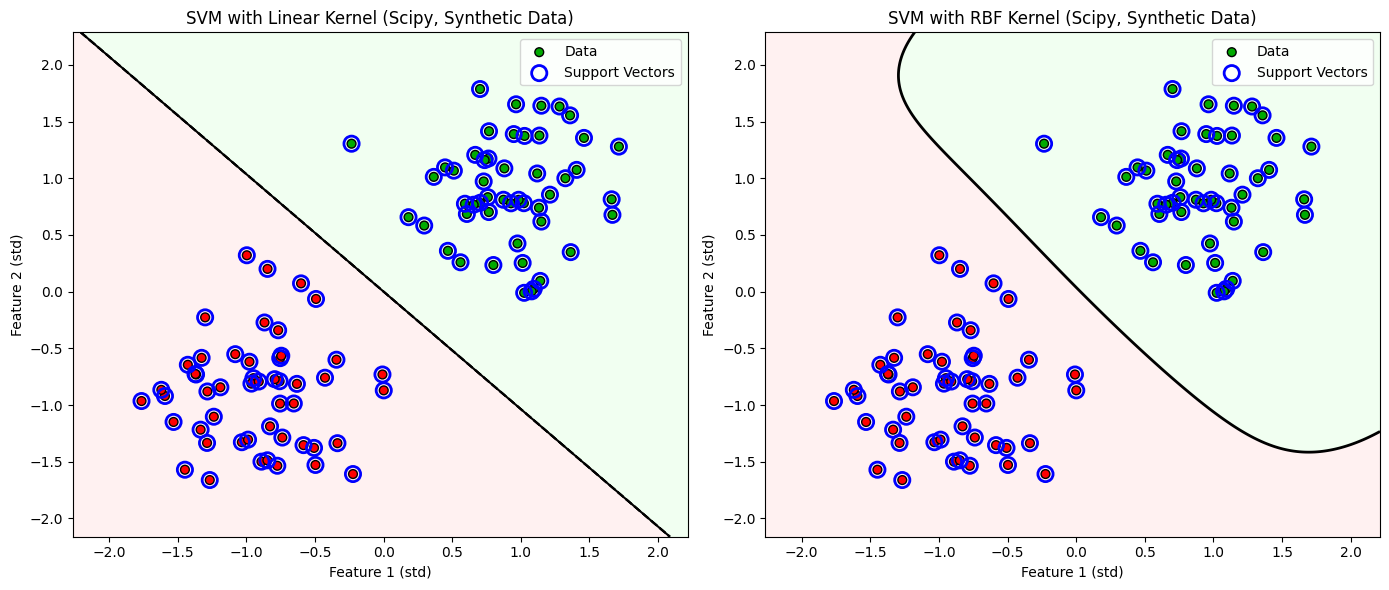

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate a synthetic, clearly separable dataset for SVM demonstration
np.random.seed(42)
N = 50
X_pos = np.random.randn(N, 2) + [2, 2]
X_neg = np.random.randn(N, 2) + [-2, -2]
X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(N), -np.ones(N)])

# Standardize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Linear kernel function
def linear_kernel(x1, x2):
    return np.dot(x1, x2.T)

# RBF kernel function
def rbf_kernel(x1, x2, gamma=1.0):
    if x1.ndim == 1:
        x1 = x1[np.newaxis, :]
    if x2.ndim == 1:
        x2 = x2[np.newaxis, :]
    dists = np.sum((x1[:, np.newaxis, :] - x2[np.newaxis, :, :]) ** 2, axis=2)
    return np.exp(-gamma * dists)

# SVM dual objective
def svm_dual(K, y):
    n = len(y)
    def objective(alpha):
        return 0.5 * np.sum(alpha * alpha * y * y * K) - np.sum(alpha)
    def zerofun(alpha):
        return np.dot(alpha, y)
    bounds = [(0, None)] * n
    cons = {'type': 'eq', 'fun': zerofun}
    alpha0 = np.zeros(n)
    res = minimize(objective, alpha0, bounds=bounds, constraints=cons)
    return res.x

# Train SVM with linear kernel
K_linear = linear_kernel(X, X)
alpha_linear = svm_dual(K_linear, y)
sv_idx = alpha_linear > 1e-5
w = np.sum((alpha_linear[sv_idx] * y[sv_idx])[:, None] * X[sv_idx], axis=0)
b = np.mean(y[sv_idx] - np.dot(X[sv_idx], w))

# Train SVM with RBF kernel
gamma = 1.0
K_rbf = rbf_kernel(X, X, gamma=gamma)
alpha_rbf = svm_dual(K_rbf, y)
sv_idx_rbf = alpha_rbf > 1e-5
b_rbf = np.mean(y[sv_idx_rbf] - np.sum(alpha_rbf[sv_idx_rbf] * y[sv_idx_rbf] * K_rbf[sv_idx_rbf][:, sv_idx_rbf], axis=1))

# Create meshgrid for decision regions
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Linear SVM decision function and margins
Z_linear = np.dot(grid, w) + b
Z_linear = Z_linear.reshape(xx.shape)

# RBF SVM decision function
K_test = rbf_kernel(grid, X, gamma=gamma)
decision_rbf = np.sum(alpha_rbf * y * K_test, axis=1) + b_rbf
Z_rbf = decision_rbf.reshape(xx.shape)

# Plot
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cmap_bg = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_pts = ListedColormap(['#FF0000', '#00AA00'])

# Linear SVM plot
axes[0].contourf(xx, yy, Z_linear > 0, alpha=0.2, cmap=cmap_bg)
axes[0].contour(xx, yy, Z_linear, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
axes[0].scatter(X[:,0], X[:,1], c=y, cmap=cmap_pts, edgecolors='k', s=40, label='Data')
axes[0].scatter(X[sv_idx,0], X[sv_idx,1], s=120, facecolors='none', edgecolors='b', linewidths=2, label='Support Vectors')
axes[0].set_title('SVM with Linear Kernel (Scipy, Synthetic Data)')
axes[0].set_xlabel('Feature 1 (std)')
axes[0].set_ylabel('Feature 2 (std)')
axes[0].legend()

# RBF SVM plot
axes[1].contourf(xx, yy, Z_rbf > 0, alpha=0.2, cmap=cmap_bg)
axes[1].contour(xx, yy, Z_rbf, levels=[0], colors='k', linewidths=2)
axes[1].scatter(X[:,0], X[:,1], c=y, cmap=cmap_pts, edgecolors='k', s=40, label='Data')
axes[1].scatter(X[sv_idx_rbf,0], X[sv_idx_rbf,1], s=120, facecolors='none', edgecolors='b', linewidths=2, label='Support Vectors')
axes[1].set_title('SVM with RBF Kernel (Scipy, Synthetic Data)')
axes[1].set_xlabel('Feature 1 (std)')
axes[1].set_ylabel('Feature 2 (std)')
axes[1].legend()

plt.tight_layout()
plt.show()

## Explanation
- This example uses a synthetic dataset with two clearly separable classes, which is ideal for visualizing and understanding SVMs.
- The two classes are generated from different Gaussian distributions, making the margin and support vectors easy to interpret.
- Both linear and RBF (Gaussian) kernels are demonstrated, showing the difference in decision boundaries.
- The code solves the SVM **dual problem** using SciPy's optimizer and visualizes the results, including support vectors and decision regions.
- This setup is perfect for educational purposes and for illustrating the geometric intuition behind SVMs.

### Mathematical Formulation

#### 1. SVM Primal Problem (Linear Case)
Given data $\{(\mathbf{x}_i, y_i)\}_{i=1}^n$ with $y_i \in \{-1, 1\}$, the SVM seeks the hyperplane $\mathbf{w}^T\mathbf{x} + b = 0$ that maximizes the margin:

$$
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2 \\
\text{subject to } \ y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \ \forall i
$$

#### 2. SVM Dual Problem
The dual form (which is what we solve in this example) is:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to } \sum_{i=1}^n \alpha_i y_i = 0, \ \alpha_i \geq 0
$$
where $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function.

#### 3. Kernel Trick
- **Linear kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$
- **RBF (Gaussian) kernel:** $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2)$

The kernel trick allows SVMs to find nonlinear boundaries by implicitly mapping data to a higher-dimensional space.

#### 4. Decision Function
After solving for $\alpha$, the SVM decision function is:

$$
f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
$$

- **Support vectors** are the points with $\alpha_i > 0$; they define the margin and the decision boundary.
- The margin is $\frac{2}{\|\mathbf{w}\|}$ in the linear case.

### Key Takeaways
- The dual formulation enables the use of kernels for nonlinear classification.
- Only support vectors (with nonzero $\alpha$) contribute to the decision boundary.
- Visualizing both linear and nonlinear SVMs on synthetic data helps build intuition for how SVMs work.

---

# Summary and Self-Assessment

## Key Takeaways
- **SVMs** are powerful for both classification and regression, especially in high-dimensional spaces.
- The **margin** is maximized to achieve the best separation between classes:
  $$
  \text{Margin} = \frac{2}{\|\mathbf{w}\|}
  $$
- The **kernel trick** enables SVMs to handle nonlinear data by implicitly mapping to higher-dimensional spaces:
  $$
  K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
  $$
- The **dual problem** formulation allows efficient computation and use of kernels:
  $$
  \max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)
  $$
- **Support vectors** are the data points that define the margin and the decision boundary.
- **SVR** uses the $\epsilon$-insensitive loss to focus on significant errors in regression tasks.
- **Hyperparameter tuning** (using $C$, $\gamma$, and kernel choice) and **cross-validation** are essential for optimal performance.
- **Model evaluation** with ROC and PR curves provides insight into classifier performance, especially for imbalanced data.

## Review Questions
- What is the main idea behind SVMs?
- How do kernels enable nonlinear classification?
- What are the key hyperparameters in SVMs and what do they control?
- How do you interpret support vectors and the margin?
- When would you use SVR instead of standard regression?
- Write the equations for the SVM decision function, margin, and kernel.